In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs


In [ ]:
X, _ = make_blobs(n_samples=1000, centers=4, cluster_std=0.6, random_state=42)

k_values = range(2, 11)

lst_wcss = []
lst_silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Calculate WCSS (inertia)
    lst_wcss.append(kmeans.inertia_)
    
    # Calculate silhouette score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    lst_silhouette_scores.append(silhouette_avg)


c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available thread

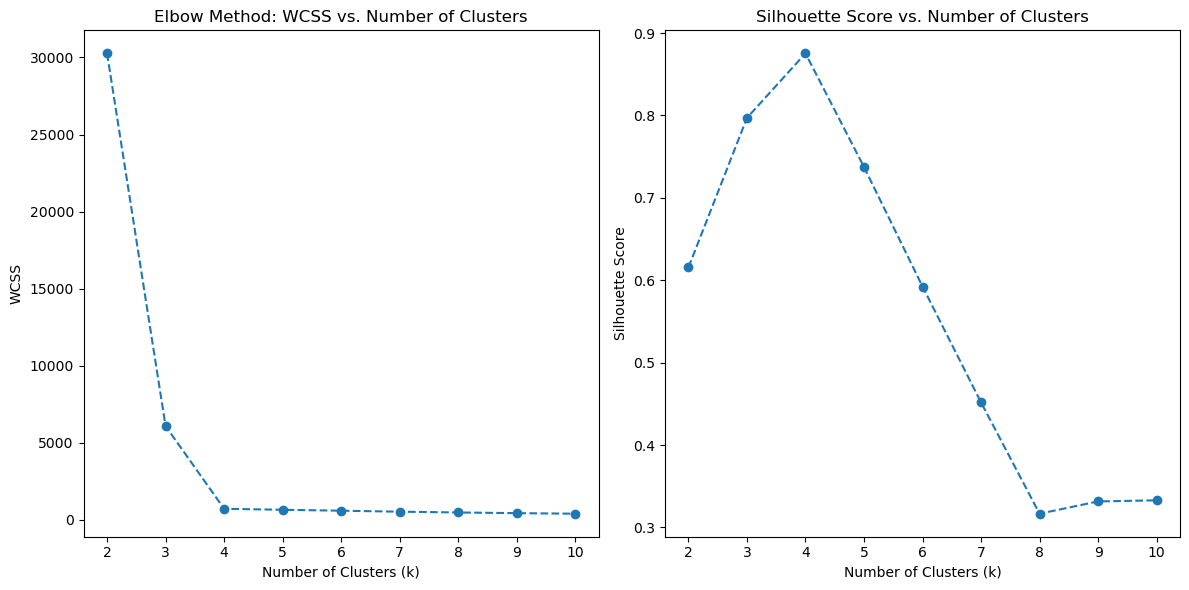

Optimal k based on WCSS (Elbow Method): 6
Optimal k based on Silhouette Score: 4
Selected Optimal k: 6


In [1]:


# Plot WCSS to visualize the "elbow" method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, lst_wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method: WCSS vs. Number of Clusters')

# Plot Silhouette scores to find the optimal k
plt.subplot(1, 2, 2)
plt.plot(k_values, lst_silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')

plt.tight_layout()
plt.show()




In [ ]:
# Function to automatically select the optimal k
def select_optimal_k(wcss, silhouette_scores, k_values):
    # 1. Elbow method: Select k where the WCSS curve bends
    # Using a heuristic: choose k where WCSS decreases significantly slower (i.e., the "elbow")
    wcss_diffs = np.diff(wcss)
    wcss_diffs_diffs = np.diff(wcss_diffs)  # Second derivative to find the "elbow"
    elbow_k = k_values[np.argmin(wcss_diffs_diffs) + 1]
    
    # 2. Silhouette method: Choose k that maximizes the silhouette score
    silhouette_k = k_values[np.argmax(silhouette_scores)]
    
    # Combine the two methods: We choose the larger of the two as a balance between cohesion and separation
    optimal_k = max(elbow_k, silhouette_k)
    
    return optimal_k, elbow_k, silhouette_k


In [ ]:
# Find optimal k using WCSS (Elbow) and Silhouette methods
optimal_k, elbow_k, silhouette_k = select_optimal_k(lst_wcss, lst_silhouette_scores, k_values)

print(f"Optimal k based on WCSS (Elbow Method): {elbow_k}")
print(f"Optimal k based on Silhouette Score: {silhouette_k}")
print(f"Selected Optimal k: {optimal_k}")
